# Accuracy Flagging: Matching Lito with Clusters

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from boxplots import *
#from confusion_matrix import *
#from count_plots import *
from numpy import average
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score

import seaborn as sns

In [7]:
data = pd.read_csv('output_varplus.csv')
data.columns

Index(['Unnamed: 0', 'bhid', 'from', 'to', 'x', 'y', 'z', 'al2o3_gl', 'cao_gl',
       'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'sio2_gl', 'tio2_gl', 'ppc_gl',
       'lito', 'lito_eval', 'lito_ds', 'lito_km', 'lito_ag'],
      dtype='object')

In [8]:
data['acc_km'] = np.where(data['lito_km'] == data['lito'], True, False)
data['acc_dss'] = np.where(data['lito_ds'] == data['lito'], True, False)
data['acc_ag'] = np.where(data['lito_ag'] == data['lito'], True, False)

for col in data.columns[53:56]:
    print(data[col].value_counts())



# Evaluated lito w/ geochemistry tree

data['acc_km_eval'] = np.where(data['lito_km'] == data['lito_eval'], True,False)
data['acc_dss_eval'] = np.where(data['lito_ds'] == data['lito_eval'], True, False)
data['acc_ag_eval'] = np.where(data['lito_ag'] == data['lito_eval'], True,False)

#for col in data.columns[53:56]:
#    print(data[col].value_counts())

In [9]:
data['length'] = data['to'] - data['from']

In [10]:
data[['bhid','x','y', 'z', 'from', 'to', 'length', 'acc_dss', 'acc_km', 'acc_ag', 'acc_dss_eval', 'acc_km_eval', 'acc_ag_eval']]

,bhid,x,y,z,from,to,length,acc_dss,acc_km,acc_ag,acc_dss_eval,acc_km_eval,acc_ag_eval
0,CNFDC14001,612565.19,7738514.56,1301.43,16.920,28.700,11.780,False,False,False,True,True,True
1,CNFDC14001,612560.42,7738513.30,1290.74,28.700,40.480,11.780,False,False,False,True,True,True
2,CNFDC14001,612555.65,7738512.04,1280.04,40.480,52.260,11.780,False,False,False,True,True,False
3,CNFDC14001,612545.82,7738509.44,1257.98,65.750,75.580,9.830,False,True,True,False,True,True
4,CNFDC14001,612541.84,7738508.39,1249.05,75.580,85.410,9.830,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,SMFD14015,611584.96,7737788.33,1323.22,188.500,202.300,13.800,False,True,True,False,True,True
3007,SMFD14015,611575.25,7737785.31,1304.28,210.400,223.400,13.000,False,False,False,False,False,False
3008,SMFD14015,611569.54,7737783.49,1293.23,223.400,235.533,12.133,True,True,True,True,True,True
3009,SMFD14015,611563.99,7737781.69,1282.59,235.533,247.667,12.134,True,True,True,True,True,True


In [11]:

aux = data[['bhid','x','y', 'z', 'from', 'to', 'length', 'acc_dss', 'acc_km', 'acc_ag', 'acc_dss_eval', 'acc_km_eval', 'acc_ag_eval']].copy()

aux.bhid = aux.bhid.str.strip()

aux[aux.bhid == 'CNFD13001']

,bhid,x,y,z,from,to,length,acc_dss,acc_km,acc_ag,acc_dss_eval,acc_km_eval,acc_ag_eval
68,CNFD13001,612976.16,7737790.63,1178.97,125.31,138.31,13.00,False,False,False,False,False,False
69,CNFD13001,612969.95,7737789.17,1168.34,138.31,150.10,11.79,True,False,True,True,False,True


In [12]:
df_sum_error_ds = aux[~aux['acc_dss']].groupby('bhid')[['length']].sum().reset_index()
df_sum_error_km = aux[~aux['acc_km']].groupby('bhid')[['length']].sum().reset_index()
df_sum_error_ag = aux[~aux['acc_ag']].groupby('bhid')[['length']].sum().reset_index()

In [13]:
df_total_length = aux.groupby("bhid")[['length']].sum().reset_index()


In [14]:
collar = pd.read_csv('collar.csv')

collar.bhid = collar.bhid.str.strip()

In [15]:
len(df_total_length) == len(collar)

True

In [16]:
df_total_length = pd.merge(df_total_length, collar, how='inner', on='bhid')

df_total_length

,bhid,length,x,y,z
0,CNFD13001,24.79,612979.42,7737791.40,1184.54
1,CNFD13002,184.82,613018.74,7737887.43,1264.35
2,CNFD13003,151.61,612955.46,7737783.40,1150.88
3,CNFD13004,196.86,612982.51,7737498.26,1155.34
4,CNFD13005,94.75,612977.35,7738211.25,1185.32
...,...,...,...,...,...
287,SMFDC14006,39.75,611163.13,7737805.15,1492.43
288,SMFDC14007,62.15,611200.93,7737824.09,1499.32
289,SMFDC14008,46.65,611248.12,7737931.71,1479.17
290,SMFDC14009,38.95,611304.30,7737845.66,1468.92


In [17]:

map_error_ds = df_total_length.merge(df_sum_error_ds, how='inner', on='bhid', suffixes=('_sum_dss', '_sum_error_dss'))
map_error_km = df_total_length.merge(df_sum_error_km, how='inner', on='bhid', suffixes=('_sum_km', '_sum_error_km'))
map_error_ag = df_total_length.merge(df_sum_error_ag, how='inner', on='bhid', suffixes=('_sum_ag', '_sum_error_ag'))


map_error_ds['error'] = map_error_ds.length_sum_error_dss / map_error_ds.length_sum_dss
map_error_km['error'] = map_error_km.length_sum_error_km / map_error_km.length_sum_km
map_error_ag['error'] = map_error_ag.length_sum_error_ag / map_error_ag.length_sum_ag


In [18]:
map_error_ds_thresh = map_error_ds.query('error >= 0.7')
map_error_ag_thresh = map_error_ag.query('error >= 0.7')
map_error_km_thresh = map_error_km.query('error >= 0.7')
map_error_ds_thresh

,bhid,length_sum_dss,x,y,z,length_sum_error_dss,error
15,CNFDC14001,71.19,612567.58,7738515.19,1306.78,71.19,1.000000
26,COFD13004,59.27,611420.89,7736119.06,1426.63,47.59,0.802936
43,COFDC14001,64.40,612293.68,7737389.98,1416.04,64.40,1.000000
49,CPFD12006,82.65,613275.45,7736110.69,1035.24,70.09,0.848034
51,CPFD13002,11.41,612871.82,7736734.22,1059.72,11.41,1.000000
...,...,...,...,...,...,...,...
243,SMFD14015,129.00,611617.52,7737797.91,1387.51,92.60,0.717829
245,SMFDC14002,28.75,611134.69,7737981.95,1502.20,28.75,1.000000
247,SMFDC14004,32.85,611216.89,7738033.19,1498.07,32.85,1.000000
248,SMFDC14006,39.75,611163.13,7737805.15,1492.43,39.75,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_17484\4235727671.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(points, fraction=0.05, aspect=50, shrink=1)


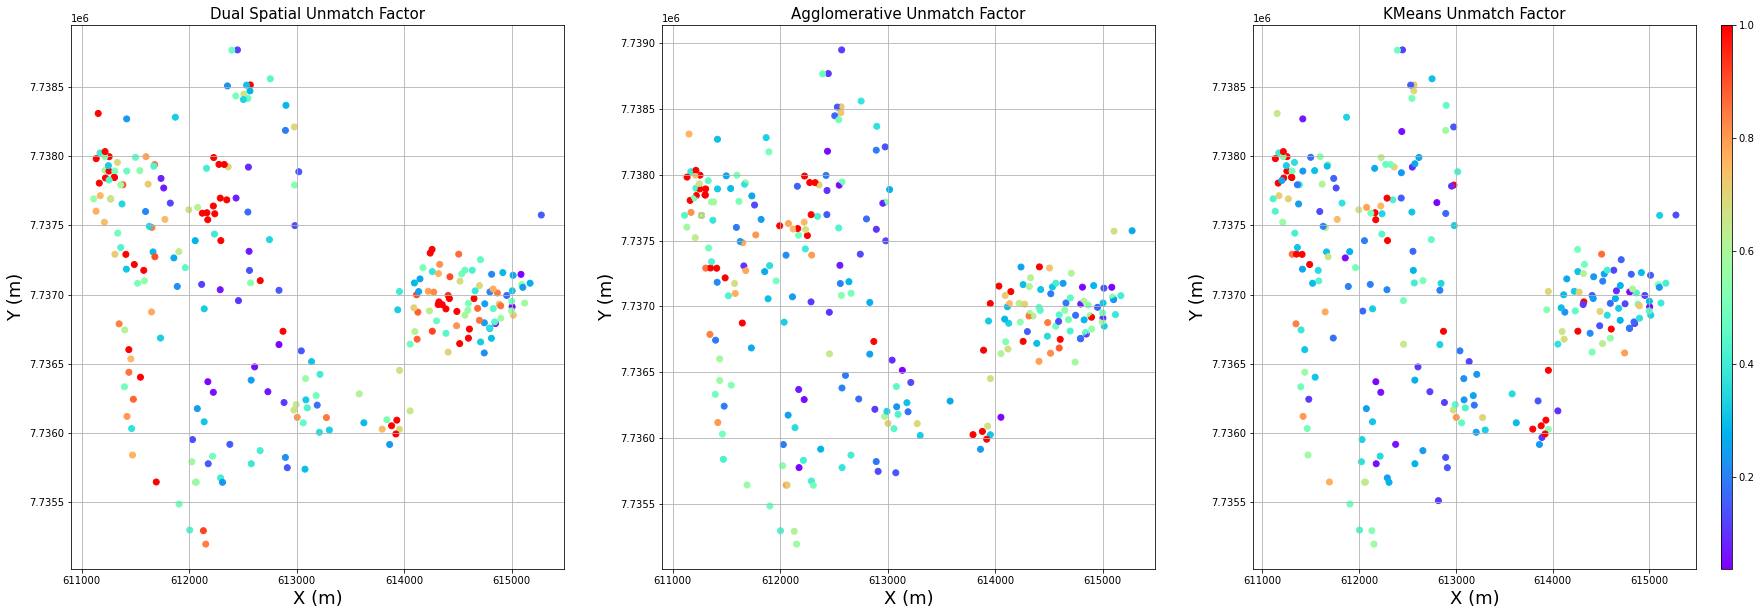

In [19]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].scatter(map_error_ds['x'], map_error_ds['y'], c = map_error_ds['error'], cmap='rainbow', label=map_error_ds['error'])
ax[0].set_title('Dual Spatial Unmatch Factor', fontdict={'fontsize':15})
ax[0].grid()
ax[0].set_xlabel('X (m)', fontsize=18)
ax[0].set_ylabel('Y (m)', fontsize=18)
ax[1].scatter(map_error_ag['x'], map_error_ag['y'], c = map_error_ag['error'], cmap='rainbow', label=map_error_ag['error'])
ax[1].set_title('Agglomerative Unmatch Factor', fontdict={'fontsize':15})
ax[1].grid()
ax[1].set_xlabel('X (m)', fontsize=18)
ax[1].set_ylabel('Y (m)', fontsize=18)
ax[2].scatter(map_error_km['x'], map_error_km['y'], c = map_error_km['error'], cmap='rainbow', label=map_error_km['error'])
ax[2].set_title('KMeans Unmatch Factor', fontdict={'fontsize':15})
ax[2].grid()
ax[2].set_xlabel('X (m)', fontsize=18)
ax[2].set_ylabel('Y (m)', fontsize=18)
points = ax[1].scatter(map_error_ag['x'], map_error_ag['y'], c=map_error_ag['error'], cmap='rainbow', s=10, label=map_error_ag['error'])
fig.colorbar(points, fraction=0.05, aspect=50, shrink=1)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17484\3811400205.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(points, fraction=0.05, aspect=50, shrink=1)


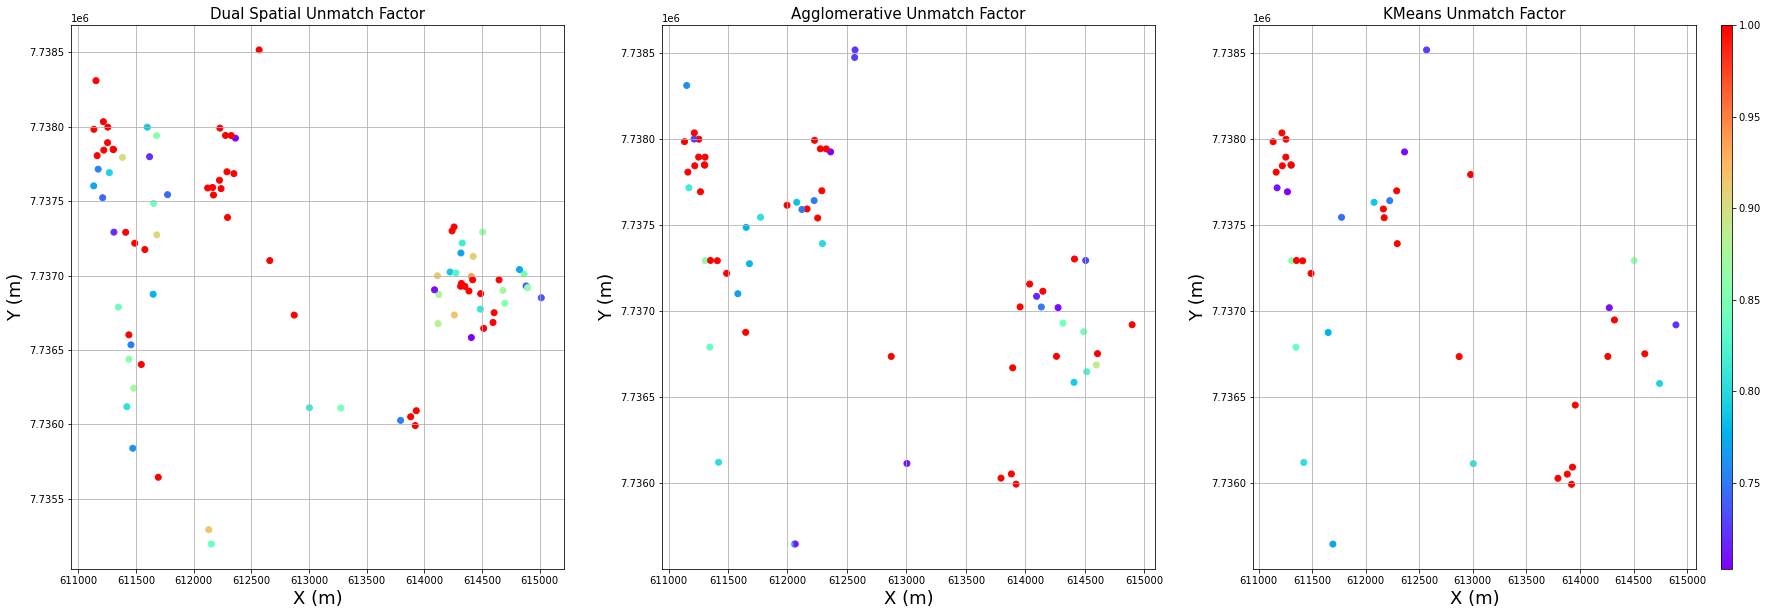

In [21]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].scatter(map_error_ds_thresh['x'], map_error_ds_thresh['y'], c = map_error_ds_thresh['error'], cmap='rainbow', label=map_error_ds_thresh['error'])
ax[0].set_title('Dual Spatial Unmatch Factor', fontdict={'fontsize':15})
ax[0].grid()
ax[0].set_xlabel('X (m)', fontsize=18)
ax[0].set_ylabel('Y (m)', fontsize=18)
ax[1].scatter(map_error_ag_thresh['x'], map_error_ag_thresh['y'], c = map_error_ag_thresh['error'], cmap='rainbow', label=map_error_ag_thresh['error'])
ax[1].set_title('Agglomerative Unmatch Factor', fontdict={'fontsize':15})
ax[1].grid()
ax[1].set_xlabel('X (m)', fontsize=18)
ax[1].set_ylabel('Y (m)', fontsize=18)
ax[2].scatter(map_error_km_thresh['x'], map_error_km_thresh['y'], c = map_error_km_thresh['error'], cmap='rainbow', label=map_error_km_thresh['error'])
ax[2].set_title('KMeans Unmatch Factor', fontdict={'fontsize':15})
ax[2].grid()
ax[2].set_xlabel('X (m)', fontsize=18)
ax[2].set_ylabel('Y (m)', fontsize=18)
points = ax[1].scatter(map_error_ag_thresh['x'], map_error_ag_thresh['y'], c=map_error_ag_thresh['error'], cmap='rainbow', s=10, label=map_error_ag_thresh['error'])
fig.colorbar(points, fraction=0.05, aspect=50, shrink=1)

In [22]:
wells_thrsh = np.unique(map_error_ag_thresh['bhid'])

wells_thrsh

array(['CNFDC14001', 'CNFDC14002', 'COFD13004', 'COFD14005', 'COFDC14001',
       'CPFD13002', 'CPFDC14009', 'CSNCN-FSD-10-010', 'CSNCN-FSD-10-011',
       'CSNCN-FSD-10-013', 'CSNCN-FSD-10-015', 'CSNCN-FSD-10-016',
       'CSNCN-FSD-10-017', 'CSNCN-FSD-10-018', 'CSNCN-FSD-10-019',
       'CSNCN-FSD-10-020', 'CSNCN-FSD-10-021', 'CSNCO-FSD-09-001',
       'CSNCO-FSD-09-009', 'CSNCO-FSD-09-010', 'CSNCO-FSD-09-012',
       'CSNCO-FSD-10-001', 'CSNCP-FSD-10-007', 'CSNCP-FSD-10-009',
       'CSNSM-FSD-09-001', 'CSNSM-FSD-09-002', 'CSNSM-FSD-09-003',
       'CSNSM-FSD-09-006', 'CSNSM-FSD-09-007', 'CSNSM-FSD-10-002',
       'CSNSM-FSD-10-003', 'CSNSM-FSD-10-005', 'CSNSM-FSD-10-007',
       'CSNSM-FSD-10-008', 'CSNSM-FSD-10-010', 'CSNSM-FSD-10-011',
       'EGFD12002', 'EGFD13008', 'EGFD13019', 'EGFD14023', 'EGFD14026',
       'EGFD14027', 'NAMEN-FSD-08-012', 'NAMEN-FSD-08-013',
       'NAMEN-FSD-08-014', 'NAMEN-FSD-08-015', 'NAMEN-FSD-08-019',
       'NAMEN-FSD-08-025', 'NAMEN-FSD-08-027', 'N

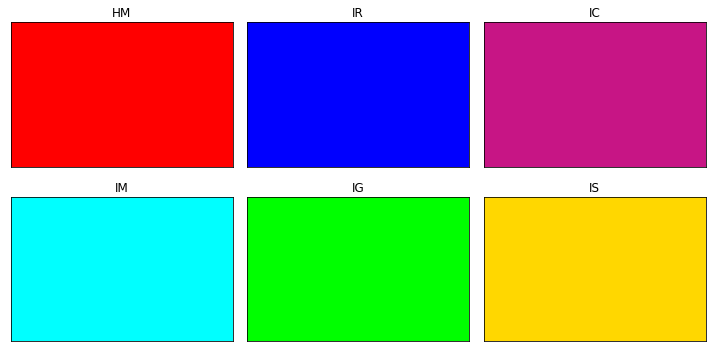

In [23]:
lithology_numbers = {'HM': {'lith':'HM', 'lith_num':1, 'hatch': '..', 'color':'red'},
                 'IR': {'lith':'IR', 'lith_num':2, 'hatch':'-.', 'color':'blue'},
                 'IC': {'lith':'IC', 'lith_num':3, 'hatch':'--', 'color':'mediumvioletred'},
                 'IM': {'lith':'IM', 'lith_num':4, 'hatch':'', 'color':'aqua'},
                 'IG': {'lith':'IG', 'lith_num':5, 'hatch':'-/', 'color':'lime'},
                 'IS': {'lith':'IS', 'lith_num':6, 'hatch':'+', 'color':'gold'}}
""
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'


y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=3,nrows=2, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()
plt.show()

ValueError: Axis limits cannot be NaN or Inf

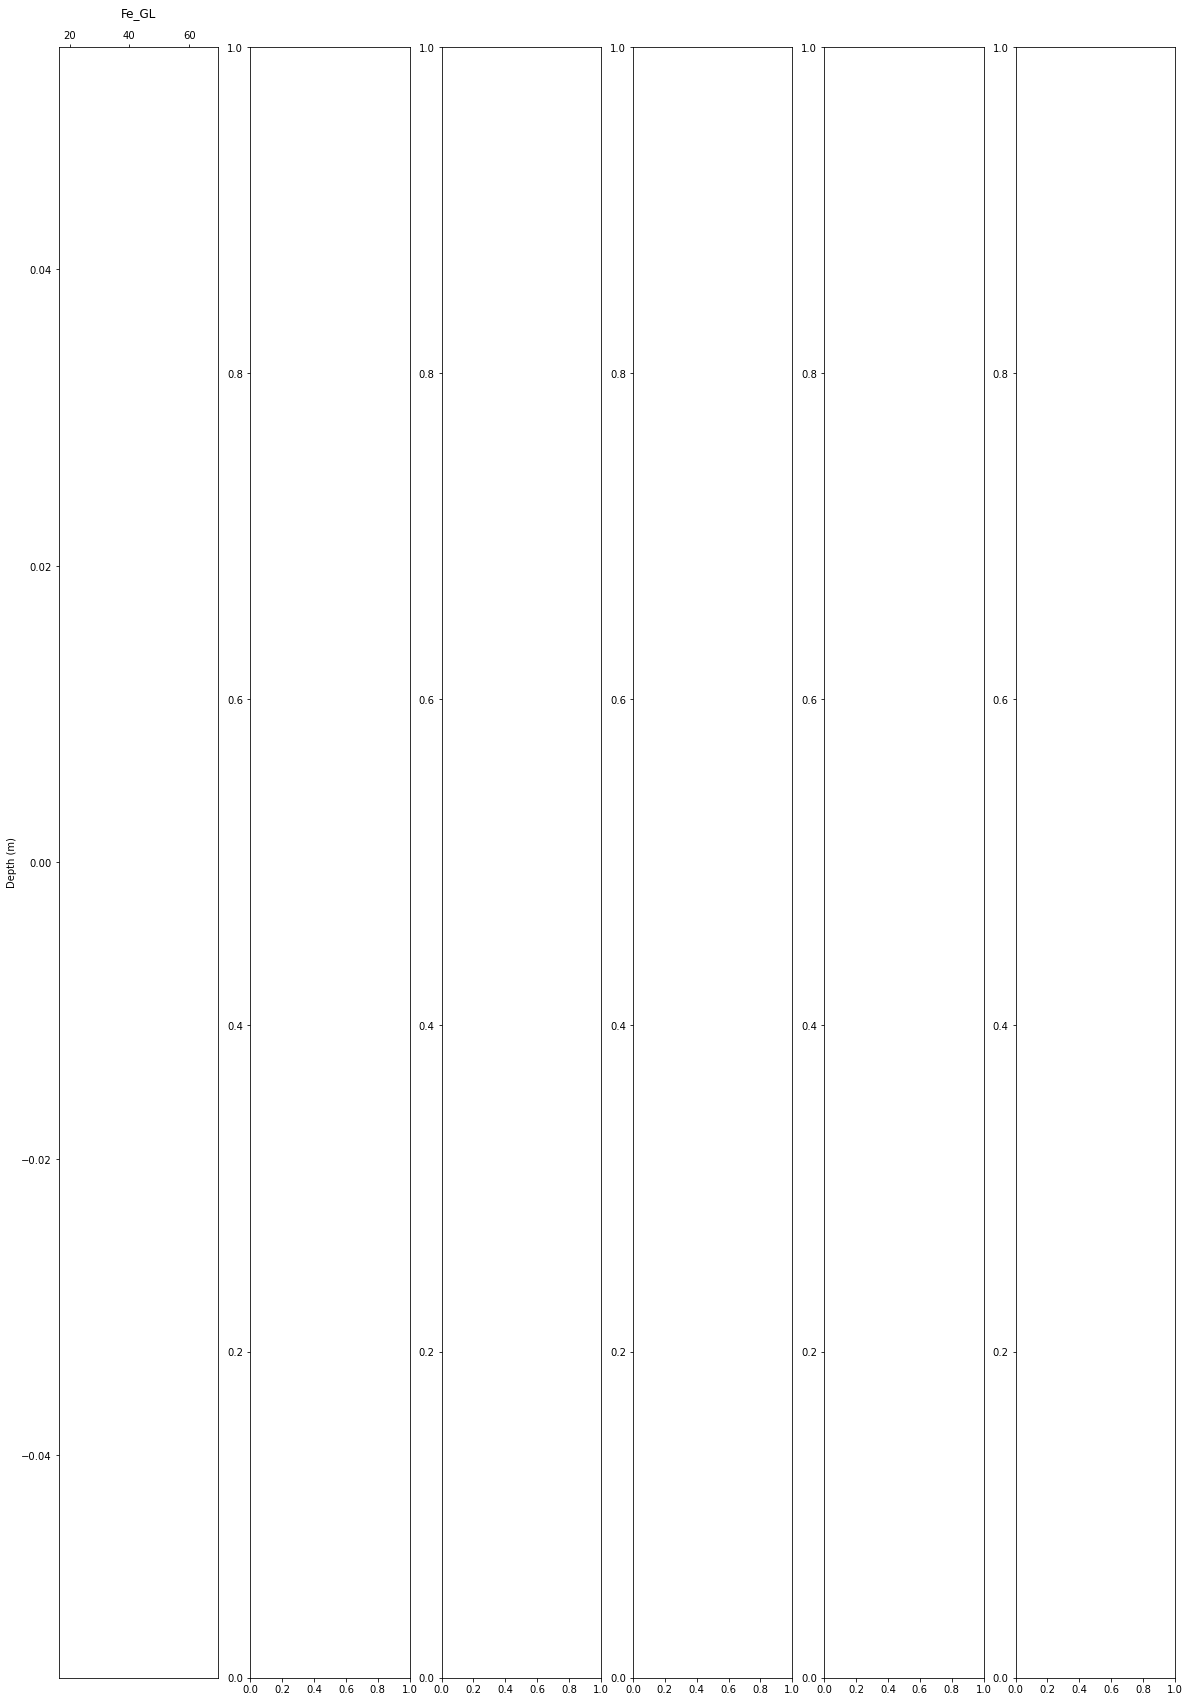

In [26]:
bhid = 'EGFD12001' #CNFD14004, EGFD12001
well = data.query(f"bhid == '{bhid}'") 

fig, ax = plt.subplots(figsize=(20,30))

ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,6), (0,5), rowspan=1, colspan = 1)


ax1.plot("fe_gl", "z", data = well, color = "red", linewidth=3, label='Grade')
ax1.set_xlim(np.min(data['fe_gl']), np.max(data['fe_gl']))
ax1.set_title('Fe_GL', y=1.015)
ax1.set_ylabel('Depth (m)')
ax1.spines["top"].set_position(("axes", 1.00))
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.set_ylim(np.min(well['z']), np.max(well['z']))
ax1.tick_params(axis='x')
ax1.axvline(np.mean(data['fe_gl']), linestyle = 'dashed', color = 'blue', label = 'Mean')
ax1.grid()
ax1.legend()

ax2.plot("sio2_gl", "z", data = well, color = "green", linewidth=3, label='Grade')
ax2.set_xlim(np.min(data['sio2_gl']), np.max(data['sio2_gl']))
ax2.spines["top"].set_position(("axes", 1.00))
ax2.set_title('SiO2_GL', y=1.015)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_ylim(np.min(well['z']), np.max(well['z']))
ax2.axvline(np.mean(data['sio2_gl']), linestyle = 'dashed', color = 'blue', label='Mean')
ax2.grid()
ax2.legend()

for idx, row in well[['from', 'to', 'lito']].iterrows():
    color = lithology_numbers[row['lito']]['color']
    # for key in lithology_numbers.keys():
    ax3.axhspan(row['from'], row['to'],0, 320, color=color, label=row['lito'])

for idx, row in well[['from', 'to', 'lito_ds']].iterrows():
    color = lithology_numbers[row['lito_ds']]['color']
    # for key in lithology_numbers.keys():
    ax4.axhspan(row['from'], row['to'], color=color, label=row['lito_ds'])

for idx, row in well[['from', 'to', 'lito_km']].iterrows():
    color = lithology_numbers[row['lito_km']]['color']
    # for key in lithology_numbers.keys():
    ax5.axhspan(row['from'], row['to'], color=color, label=row['lito_km'])

for idx, row in well[['from', 'to', 'lito_ag']].iterrows():
    color = lithology_numbers[row['lito_ag']]['color']
    # for key in lithology_numbers.keys():
    ax6.axhspan(row['from'], row['to'], color=color, label=row['lito_ag'])

ax3.set_ylim(np.min(well['from']), np.max(well['to']))
ax4.set_ylim(np.min(well['from']), np.max(well['to']))
ax5.set_ylim(np.min(well['from']), np.max(well['to']))
ax6.set_ylim(np.min(well['from']), np.max(well['to']))

ax3.set_title('Original Lito')
ax4.set_title('Dual Spatial Lito')
ax5.set_title('KMeans Lito')
ax6.set_title('Agglomerative Lito')

ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])
ax5.set(yticklabels=[])
ax6.set(yticklabels=[])

import matplotlib.patches as mpatches

hm = mpatches.Patch(color='red', label='HM')
ir = mpatches.Patch(color='blue', label='IR')
ic = mpatches.Patch(color='mediumvioletred', label='IC')
im = mpatches.Patch(color='aqua', label='IM')
ig = mpatches.Patch(color='lime', label='IG')
iss = mpatches.Patch(color='gold', label='IS')

plt.legend(handles=[hm, ir, ic, im, ig, iss], loc='upper right', bbox_to_anchor=[1.6, 1], fontsize=16)

plt.suptitle(f'{bhid}', y=1, x=0.05, fontsize=16)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)
